# 음식점 데이터를 통해 예측, 분류, 군집화 하기

In [7]:
import pandas as pd
df = pd.read_csv("foodcard.csv", encoding='utf8')  # 맥이라서 하는 인코딩..!
df

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,한식,1,1,7,2.392000e+05
1,201901,한식,1,10,1618,4.671496e+07
2,201901,한식,1,20,150194,4.961334e+09
3,201901,한식,1,30,564787,2.006319e+10
4,201901,한식,1,40,817438,2.954471e+10
...,...,...,...,...,...,...
3776,202109,패밀리레스토랑,2,50,15439,4.351737e+08
3777,202109,패밀리레스토랑,2,60,4330,1.195975e+08
3778,202109,패밀리레스토랑,2,70,869,2.529147e+07
3779,202109,패밀리레스토랑,2,80,155,4.952434e+06


In [8]:
df.isnull().sum()

crym            0
tco_btc_nm      0
ma_fem_dc       0
agegrp_dc       0
tco_btc_u_ct    0
tco_btc_u_am    0
dtype: int64

In [9]:
df["tco_btc_nm"].unique()

array(['한식', '일식', '중식', '양식', '패스트푸드점', '패밀리레스토랑'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          3781 non-null   int64  
 1   tco_btc_nm    3781 non-null   object 
 2   ma_fem_dc     3781 non-null   int64  
 3   agegrp_dc     3781 non-null   int64  
 4   tco_btc_u_ct  3781 non-null   int64  
 5   tco_btc_u_am  3781 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 177.4+ KB


In [11]:
df['crym'] = df['crym'].astype(str)

df['crym'] = pd.to_datetime(df['crym'], format='%Y%m')
df

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,2019-01-01,한식,1,1,7,2.392000e+05
1,2019-01-01,한식,1,10,1618,4.671496e+07
2,2019-01-01,한식,1,20,150194,4.961334e+09
3,2019-01-01,한식,1,30,564787,2.006319e+10
4,2019-01-01,한식,1,40,817438,2.954471e+10
...,...,...,...,...,...,...
3776,2021-09-01,패밀리레스토랑,2,50,15439,4.351737e+08
3777,2021-09-01,패밀리레스토랑,2,60,4330,1.195975e+08
3778,2021-09-01,패밀리레스토랑,2,70,869,2.529147e+07
3779,2021-09-01,패밀리레스토랑,2,80,155,4.952434e+06


# 음식점 이용 건수에 따른 이용 금액 예측하기 - LinearRegression

In [12]:
tco_df = df[["crym","tco_btc_u_ct", "tco_btc_u_am"]]
tco_df

,crym,tco_btc_u_ct,tco_btc_u_am
0,2019-01-01,7,2.392000e+05
1,2019-01-01,1618,4.671496e+07
2,2019-01-01,150194,4.961334e+09
3,2019-01-01,564787,2.006319e+10
4,2019-01-01,817438,2.954471e+10
...,...,...,...
3776,2021-09-01,15439,4.351737e+08
3777,2021-09-01,4330,1.195975e+08
3778,2021-09-01,869,2.529147e+07
3779,2021-09-01,155,4.952434e+06


In [13]:
tco_df = tco_df.groupby(['crym']).sum()
tco_df

,tco_btc_u_ct,tco_btc_u_am
crym,,
2019-01-01,7635701,2.335036e+11
2019-02-01,6718594,2.082875e+11
2019-03-01,8159189,2.466039e+11
2019-04-01,8247496,2.435679e+11
2019-05-01,9019183,2.740720e+11
2019-06-01,8902624,2.626318e+11
2019-07-01,9342597,2.759589e+11
2019-08-01,9748610,2.908411e+11
2019-09-01,8486843,2.477988e+11


Text(0, 0.5, 'tco_btc_u_am')

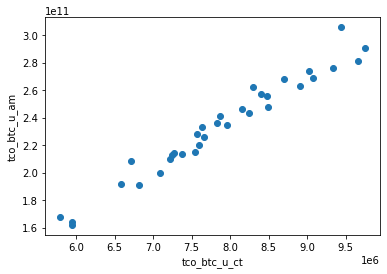

In [14]:
import numpy as np

tco_btc_u_ct = np.array(tco_df['tco_btc_u_ct']) # 이용 건수
tco_btc_u_am = np.array(tco_df['tco_btc_u_am']) # 이용 금액

tco_btc_u_ct = (tco_btc_u_ct.reshape(-1,1))
tco_btc_u_am = (tco_btc_u_am.reshape(-1,1))

import matplotlib.pyplot as plt
plt.scatter(tco_btc_u_ct, tco_btc_u_am)
plt.xlabel("tco_btc_u_ct")
plt.ylabel("tco_btc_u_am")

0.9604176462933929
254428912960
계수 [[33650.98637757]]
절편 [-3.11617252e+10]


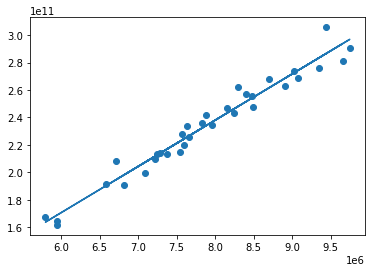

In [18]:
import sklearn
from sklearn import *
x_train,x_test,y_train,y_test= sklearn.model_selection.train_test_split(tco_btc_u_ct,tco_btc_u_am,test_size=0.2, shuffle=True, random_state=0)
model = sklearn.linear_model.LinearRegression()
model.fit(tco_btc_u_ct,tco_btc_u_am)
print(model.score(tco_btc_u_ct, tco_btc_u_am))

x_test = np.array([[8486843]],dtype = int)
print(int(model.predict(x_test))) # 2.477988e+11

pred = (model.coef_ * tco_btc_u_ct + (model.intercept_))
print("계수", model.coef_)
print("절편", model.intercept_)

plt.scatter(tco_btc_u_ct, tco_btc_u_am)
plt.plot(tco_btc_u_ct, pred)

# 남성, 여성 선호 음식점 분류 - DecisionTreeClassifier ( 점수 낮지만..! )

In [226]:
import pandas as pd
df = pd.read_csv("foodcard.csv", encoding='cp949')  # 맥이라서 하는 인코딩..!
df

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,한식,1,1,7,2.392000e+05
1,201901,한식,1,10,1618,4.671496e+07
2,201901,한식,1,20,150194,4.961334e+09
3,201901,한식,1,30,564787,2.006319e+10
4,201901,한식,1,40,817438,2.954471e+10
...,...,...,...,...,...,...
3776,202109,패밀리레스토랑,2,50,15439,4.351737e+08
3777,202109,패밀리레스토랑,2,60,4330,1.195975e+08
3778,202109,패밀리레스토랑,2,70,869,2.529147e+07
3779,202109,패밀리레스토랑,2,80,155,4.952434e+06


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   crym          3781 non-null   datetime64[ns]
 1   tco_btc_nm    3781 non-null   object        
 2   ma_fem_dc     3781 non-null   int64         
 3   agegrp_dc     3781 non-null   int64         
 4   tco_btc_u_ct  3781 non-null   int64         
 5   tco_btc_u_am  3781 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 177.4+ KB


In [221]:
print(df['tco_btc_nm'].unique())
foodlabel = ['Korean', 'Japanese', 'Chinese', 'Western', 'Fastfood', 'restaurant']
foodlabel

['한식' '일식' '중식' '양식' '패스트푸드점' '패밀리레스토랑']


['Korean', 'Japanese', 'Chinese', 'Western', 'Fastfood', 'restaurant']

In [210]:
df["tco_btc_nm"] = df["tco_btc_nm"].map({"한식":0, "일식":1,"중식":2, "양식": 3, "패스트푸드점": 4, '패밀리레스토랑': 5})  

df["tco_btc_nm"]

0       0
1       0
2       0
3       0
4       0
       ..
3776    5
3777    5
3778    5
3779    5
3780    5
Name: tco_btc_nm, Length: 3781, dtype: int64

In [211]:
tco_btc_nm = np.array(df['tco_btc_nm']) # 음식점 종류
ma_fem_dc = np.array(df['ma_fem_dc']) # 성별

tco_btc_nm = (tco_btc_nm.reshape(-1,1))
ma_fem_dc = (ma_fem_dc.reshape(-1,1))

예측 결과 (남성 선호 음식점 1, 여성 선호 음식점 2) : [1 1 1 ... 2 2 2]
분류 정확도 :  0.5054218460724677
음식점이 :  [1 2]


([<matplotlib.axis.YTick at 0x7ff764466880>,
 [Text(0, 1, 'male'), Text(0, 2, 'female')])

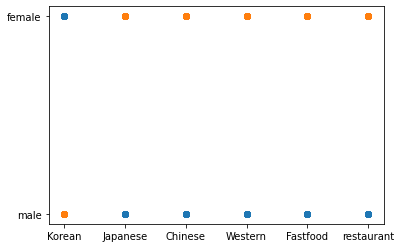

In [264]:
import sklearn
from sklearn import *
model= sklearn.tree.DecisionTreeClassifier(max_depth=10,random_state=0)
model.fit(tco_btc_nm, ma_fem_dc)
pred = model.predict(tco_btc_nm)
print("분류 정확도 : ", sklearn.metrics.accuracy_score(ma_fem_dc, pred))
print("예측 결과 (남성 선호 음식점 1, 여성 선호 음식점 2) :", pred)
x_test = np.array([[0],[5]],dtype = int)
print("음식점이 : ", model.predict(x_test))

plt.scatter(tco_btc_nm, ma_fem_dc)
plt.scatter(tco_btc_nm, pred)
plt.xticks([0, 1, 2, 3, 4, 5],foodlabel) # 이름 설정
plt.yticks([1, 2], ['male', 'female'])

# 군집화 - 음식점과 이용금액...?

In [231]:
import pandas as pd
df = pd.read_csv("foodcard.csv", encoding='cp949')  # 맥이라서 하는 인코딩..!
df["tco_btc_nm"] = df["tco_btc_nm"].map({"한식":0, "일식":1,"중식":2, "양식": 3, "패스트푸드점": 4, '패밀리레스토랑': 5})  

df

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,0,1,1,7,2.392000e+05
1,201901,0,1,10,1618,4.671496e+07
2,201901,0,1,20,150194,4.961334e+09
3,201901,0,1,30,564787,2.006319e+10
4,201901,0,1,40,817438,2.954471e+10
...,...,...,...,...,...,...
3776,202109,5,2,50,15439,4.351737e+08
3777,202109,5,2,60,4330,1.195975e+08
3778,202109,5,2,70,869,2.529147e+07
3779,202109,5,2,80,155,4.952434e+06


[0 0 0 ... 0 0 0]
응집도 추출:  1.7132514460100985e+22


Text(0, 0.5, 'pca_y')

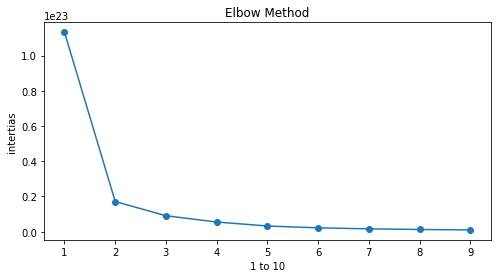

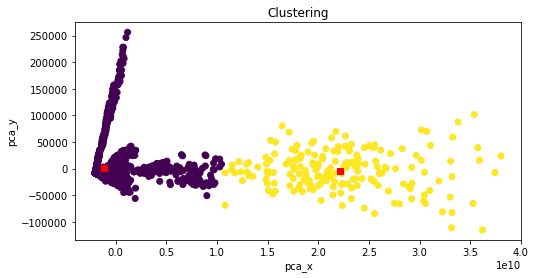

In [272]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

############ 군집화

# k값 구하기
ks = range(1, 10)
intertias = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=5)
    model.fit(df)
    intertias.append(model.inertia_)

# # k값 찾기 그래프 엘보우플롯?
plt.figure(figsize=(8, 4))
plt.plot(ks, intertias, '-o')
plt.title('Elbow Method')
plt.xlabel('1 to 10')
plt.ylabel('intertias')

# 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 군집
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_transformed)
print(kmeans.labels_)
print("응집도 추출: ", kmeans.inertia_)

# 군집화 중심점
center = kmeans.cluster_centers_
# print('센타', center)

# df에 군집결과 넣기
df['cluster'] = kmeans.labels_


# 군집 결과 시각화
plt.figure(figsize=(8, 4))
plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'])
plt.scatter(center[:,0], center[:,1], c='r', marker='s')
plt.title('Clustering')
plt.xlabel('pca_x')
plt.ylabel('pca_y')

## 군집화 결과를 보고 y축은 수가 높은 것을 보니 tco_btc_u_am(이용 금액) 인듯하고, x축은 음식점인듯하다..? 정확하지 않으며 잘 몰겠음..!